In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
from pandas import DataFrame
import pandas

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [4]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

n_step = 8

dataset = read_csv('pm2.5_non_normalised.csv', header=0, index_col=0)
#print(dataset)
dataset = series_to_supervised(dataset, n_step, 1)
values = dataset.values
#print(values)


n_train_hours = 365 * 24 * 4
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print(train.shape)
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 8, 1))
test_X = test_X.reshape((test_X.shape[0], 8, 1))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 9)
(35040, 8, 1) (35040,) (8751, 8, 1) (8751,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation, Dropout

# Network
model = Sequential()
train

model.add(LSTM(50,

    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 35040 samples, validate on 8751 samples
Epoch 1/50
 - 11s - loss: 73.1561 - val_loss: 64.2554
Epoch 2/50
 - 9s - loss: 55.2474 - val_loss: 50.2246
Epoch 3/50
 - 9s - loss: 44.7219 - val_loss: 41.6197
Epoch 4/50
 - 9s - loss: 37.9534 - val_loss: 35.7381
Epoch 5/50
 - 9s - loss: 33.1790 - val_loss: 31.6029
Epoch 6/50
 - 9s - loss: 29.7757 - val_loss: 28.7312
Epoch 7/50
 - 9s - loss: 27.1397 - val_loss: 26.5275
Epoch 8/50
 - 9s - loss: 25.3170 - val_loss: 24.6327
Epoch 9/50
 - 9s - loss: 23.8740 - val_loss: 23.2533
Epoch 10/50
 - 9s - loss: 22.5206 - val_loss: 22.1054
Epoch 11/50
 - 9s - loss: 21.4907 - val_loss: 21.3227
Epoch 12/50
 - 9s - loss: 20.7353 - val_loss: 20.2382
Epoch 13/50
 - 9s - loss: 20.0081 - val_loss: 19.6271
Epoch 14/50
 - 9s - loss: 19.4722 - val_loss: 18.8266
Epoch 15/50
 - 9s - loss: 18.7404 - val_loss: 18.0637
Epoch 16/50
 - 9s - loss: 18.3172 - val_loss: 17.5568
Epoch 17/50
 - 9s - loss: 17.9716 - val_loss: 17.4297
Epoch 18/50
 - 9s - loss: 17.6877 - val_l

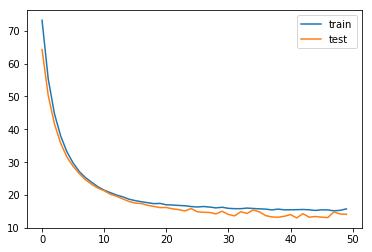

In [7]:
# plot history
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
#from numpy import scaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# # make a prediction
# print(test_X.shape)
# # test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# # invert scaling for forecast
# scaler = StandardScaler()
# scaler.fit(test_X)
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print(rmse)

# print(test_y)
# print(yhat)

In [9]:
test_X = test_X.reshape((test_X.shape[0], 8, 1))
yhat = model.predict(test_X)
print(test_y)
print(yhat)

rms =mean_squared_error(yhat, test_y)
print(rms)
yhat_lstm = yhat

[58.350097 33.199195 51.307846 ... 10.060362 10.060362  8.048289]
[[76.210625]
 [60.87787 ]
 [33.258503]
 ...
 [ 9.612026]
 [10.552701]
 [10.851929]]
762.7850665787422


In [42]:
print("After shifting")

print(test_y[:-1])
print(yhat_lstm[1:])

rms =mean_squared_error(yhat_lstm[1:], test_y[:-1])
print(rms)

After shifting
[58.350097 33.199195 51.307846 ...  8.048289 10.060362 10.060362]
[[60.87787 ]
 [33.258503]
 [56.023693]
 ...
 [ 9.612026]
 [10.552701]
 [10.851929]]
288.09711894291775


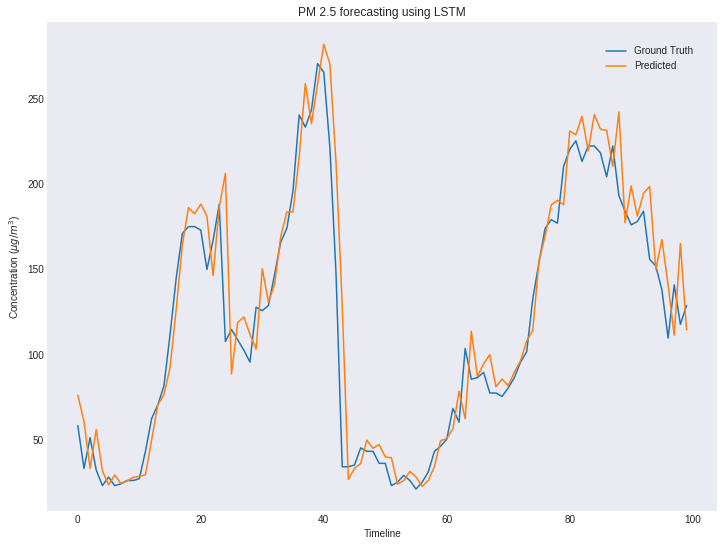

In [50]:
import matplotlib.pyplot as plt

plt.plot(test_y[:100], label="Ground Truth")
plt.plot( yhat_lstm[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using LSTM")

plt.show()

After shifting


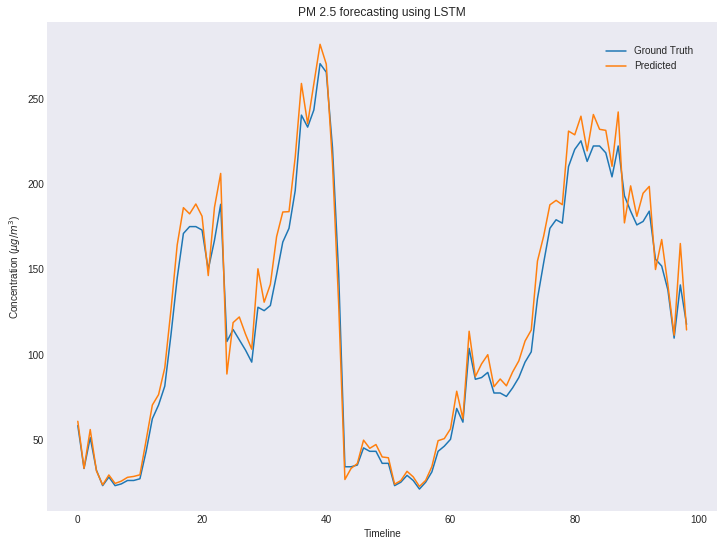

In [51]:
print("After shifting")
import matplotlib.pyplot as plt

plt.plot(test_y[:99], label="Ground Truth")
plt.plot( yhat_lstm[1:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using LSTM")

plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Network
model = Sequential()
train
model.add(Dense(64, activation='relu', input_dim=(n_step)))
model.add(Dense(256, activation='relu', input_dim=n_step))
model.add(Dense(512, activation='relu', input_dim=n_step))
model.add(Dense(256, activation='relu', input_dim=n_step))
model.add(Dense(64, activation='relu', input_dim=n_step))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

train_X = train_X.reshape((train_X.shape[0], n_step))
test_X = test_X.reshape((test_X.shape[0], n_step))
          # fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

yhat = model.predict(test_X)
print(test_y[:-1])
print(yhat[1:])

rms = sqrt(mean_squared_error(yhat, test_y))
print(rms)

yhat_mlp = yhat

In [43]:
print("After shifting")

print(test_y[:-1])
print(yhat_mlp[1:])

rms =mean_squared_error(yhat_mlp[1:], test_y[:-1])
print(rms)

After shifting
[58.350097 33.199195 51.307846 ...  8.048289 10.060362 10.060362]
[[54.916454 ]
 [29.261255 ]
 [52.474606 ]
 ...
 [ 9.243537 ]
 [10.687964 ]
 [10.9795685]]
100.34845776542686


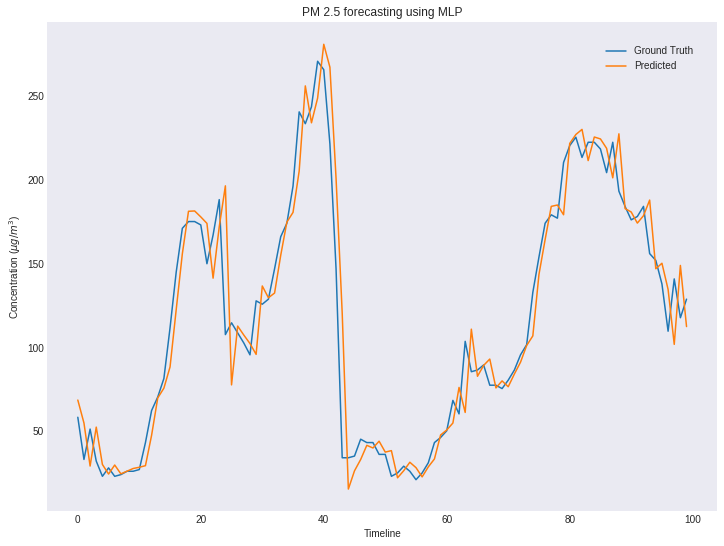

In [47]:
import matplotlib.pyplot as plt

plt.plot(test_y[:100], label="Ground Truth")
plt.plot( yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using MLP")

plt.show()

After shifting


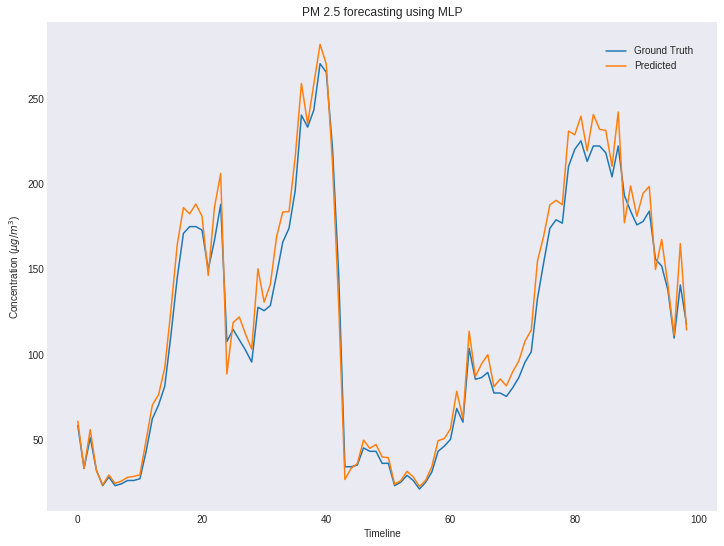

In [45]:
print("After shifting")
import matplotlib.pyplot as plt

plt.plot(test_y[:99], label="Ground Truth")
plt.plot( yhat_lstm[1:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using MLP")

plt.show()

In [0]:
for i in range(8180,8190):
  u = i/10000
  yhat_final = u*yhat_mlp + (1-u)*yhat_lstm
  print(i, mean_squared_error(yhat_final, test_y))
  

In [28]:
yhat_final = 0.8185 * yhat_mlp + (1-0.8185) * yhat_lstm
print(mean_squared_error(yhat_final, test_y))

578.315596488361


In [44]:
print("After Shifting")
yhat_final = 0.8185 * yhat_mlp + (1-0.8185) * yhat_lstm
print(mean_squared_error(yhat_final[1:], test_y[:-1]))

After Shifting
93.52045982229353


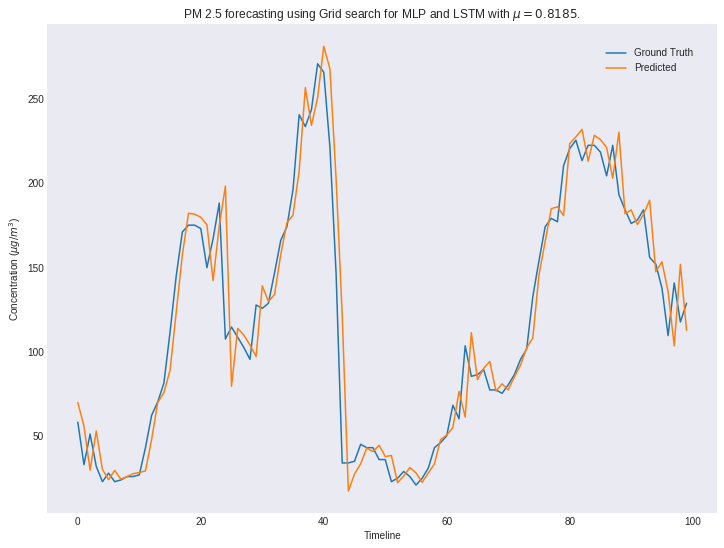

In [34]:
import matplotlib.pyplot as plt

plt.plot(test_y[:100], label="Ground Truth")
plt.plot( yhat_final[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using Grid search for MLP and LSTM with $\mu = 0.8185$.")

plt.show()

After shifting


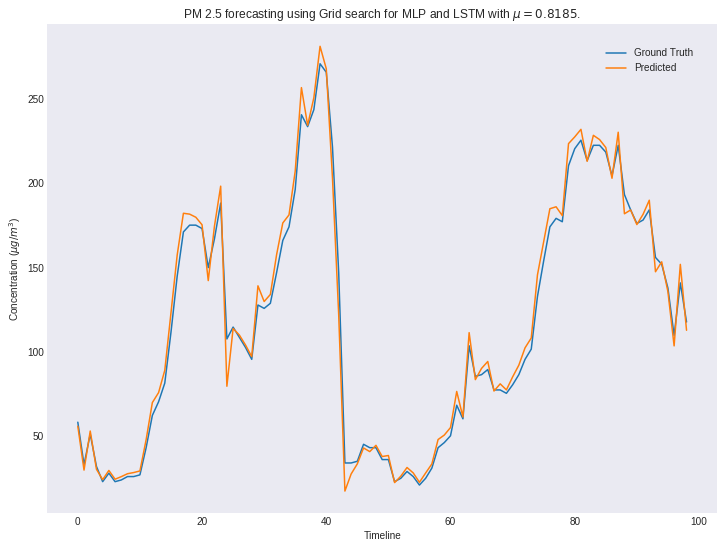

In [49]:
print("After shifting")
import matplotlib.pyplot as plt

plt.plot(test_y[:99], label="Ground Truth")
plt.plot( yhat_final[1:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using Grid search for MLP and LSTM with $\mu = 0.8185$.")

plt.show()